In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

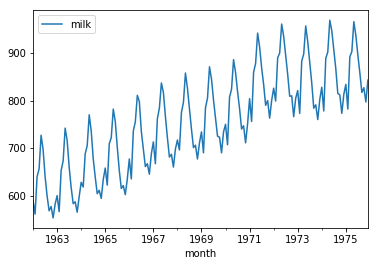

In [55]:
milk.plot()

In [56]:
import statsmodels.api as sm

In [57]:
sm.tsa.stattools.adfuller(milk.values.flatten())

(-1.3038115874221183,
 0.62742670860303673,
 13L,
 154L,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

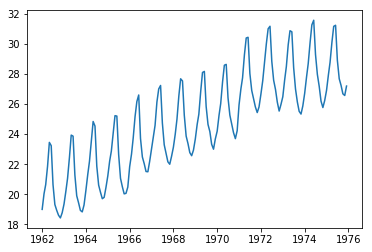

In [58]:
milk['daily']=1.*milk.values.flatten()/milk.index.days_in_month
plt.plot(milk.index,milk.daily)

In [59]:
milk.daily.values.sum()

4166.3266618994658

In [60]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)

In [61]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-2.7594694762289445,
 0.064300546541741707,
 11L,
 155L,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.153997338105512)

In [62]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)

In [63]:
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

(-2.159486093288808,
 0.22127672658830372,
 12L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [71]:
milk.daily_diff12_1 = milk.daily_diff12 - milk.daily_diff12.shift(1)

In [72]:
sm.tsa.stattools.adfuller(milk.daily_diff12_1.dropna())

(-5.4813263347969272,
 2.2808455518037347e-06,
 11L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.90513750989237)

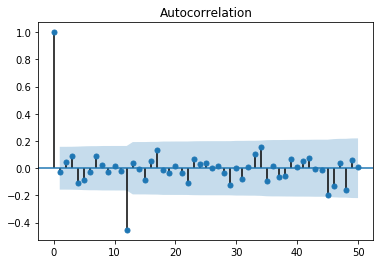

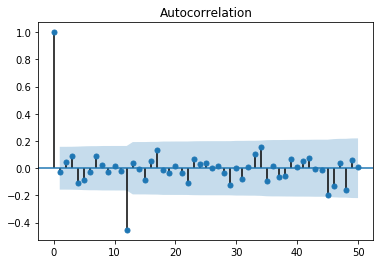

In [74]:
sm.graphics.tsa.plot_acf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)

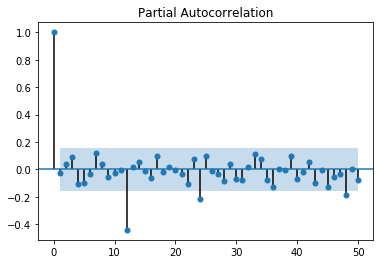

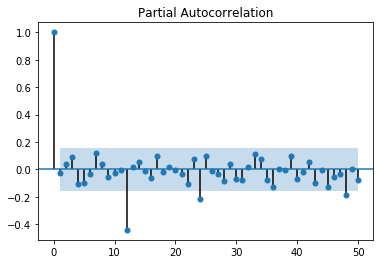

In [75]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)

In [78]:
milk

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
1962-06-01,697,23.233333
1962-07-01,640,20.645161
1962-08-01,599,19.322581
1962-09-01,568,18.933333


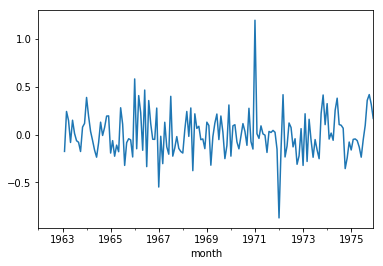

In [79]:
milk.daily_diff12_1.plot()